In [1]:
# !pip install keras-tuner

In [2]:
# !pip install pandas
# !pip install sklearn
# !pip install scikit-learn
# !pip install matplotlib

PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS
Here I will take the approach of classifying the area as small size or large size

In [3]:
#Importing libraries
# !pip install tensorflow

In [4]:
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')


import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from sklearn.metrics import classification_report


In [5]:
# import sys
# print(sys.version)

In [6]:
df =pd.read_csv("forestfires.csv")
df.info()
pd.set_option("display.max_columns",None)
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small


Here we can see at first glance that the Month and Day are already been encoded so we can drop these redundant columns month and Day.And encode the size category.Also from info we saw that there are no empty values in the data set.

In [7]:
df=df.drop(columns=["month","day","area"],axis=1)

In [8]:

df.head()
df["size_category"].unique()

array(['small', 'large'], dtype=object)

In [9]:
from sklearn.preprocessing import LabelEncoder
# Encode the small and large as 1 and 0
# Initialize LabelEncoder
encoder = LabelEncoder()

# Fit and transform the "size_category" column
df['size_category_encoded'] = encoder.fit_transform(df['size_category'])
df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category,size_category_encoded
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small,1


In [10]:
df=df.drop(columns=["size_category"],axis=1)


In [11]:
df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category_encoded
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [12]:
X = df.iloc[:, :-1]
X.head()
y=df.iloc[:, -1]
X.shape


(517, 27)

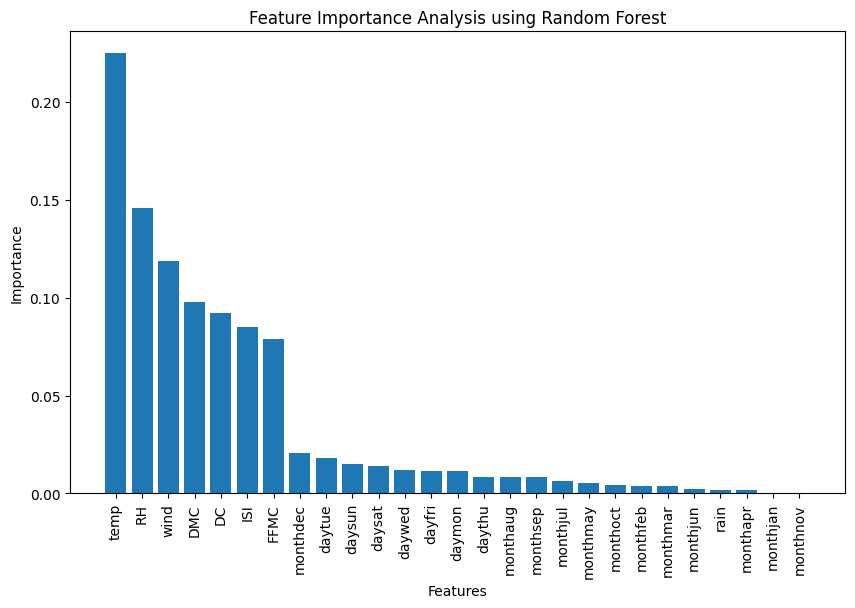

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
# Checking Feature importance
# Feature Importance Analysis using Random Forest
rf = RandomForestRegressor()
rf.fit(X, y)
importance = rf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importance)[::-1]
sorted_importance = importance[indices]
sorted_columns = df.columns[:-1][indices]

# Bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.bar(sorted_columns, sorted_importance)
plt.xticks(rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance Analysis using Random Forest')
plt.show()



In [14]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Feature importance using Principal Component Analysis (PCA)
stdalgo=StandardScaler()
stddata=stdalgo.fit_transform(X)
stddf=pd.DataFrame(stddata)
cov=stddf.cov()
values,vectors=np.linalg.eig(cov)
values

PCAalgo=PCA()
PCAalgo.fit_transform(stddf)
PCAalgo.explained_variance_ratio_
np.cumsum(PCAalgo.explained_variance_ratio_)

array([0.14027325, 0.21133607, 0.27588334, 0.33091502, 0.38026657,
       0.42870705, 0.47362862, 0.51788364, 0.55986522, 0.600875  ,
       0.6416228 , 0.68131014, 0.71899429, 0.75637893, 0.79271524,
       0.82875203, 0.8634378 , 0.89511017, 0.9264775 , 0.95110678,
       0.97288355, 0.98519845, 0.99442757, 0.99916469, 1.        ,
       1.        , 1.        ])

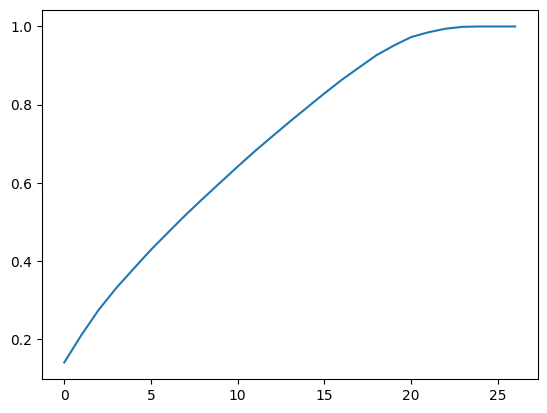

In [15]:
# Scree plot
plt.plot(np.cumsum(PCAalgo.explained_variance_ratio_))

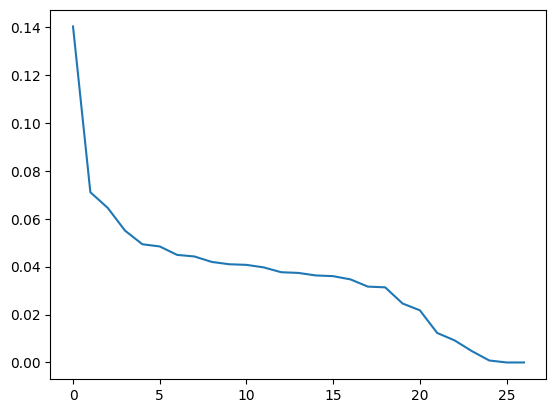

In [16]:
# Elbow Plot
plt.plot(PCAalgo.explained_variance_ratio_)

# Model Building

In [17]:
xtrain,xtest,ytrain,ytest = train_test_split(stddf,y,test_size=0.20, random_state=1)
#Initialize model
ann = Sequential()

#Add hidden layer
ann.add(Dense(units=10,activation='relu'))

#Add output layer
ann.add(Dense(units=1, activation='sigmoid'))

#Establish the connection between the layers
ann.compile(optimizer = 'adadelta',loss='binary_crossentropy',metrics='accuracy')

#Fit the data
ann.fit(xtrain,ytrain, epochs=100)

Epoch 1/100
13/13 [==============================] - 1s 2ms/step - loss: 0.8080 - accuracy: 0.4964
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 0.8079 - accuracy: 0.4964
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 0.8079 - accuracy: 0.4964
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 0.8078 - accuracy: 0.4964
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 0.8078 - accuracy: 0.4964
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 0.8077 - accuracy: 0.4964
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 0.8077 - accuracy: 0.4964
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 0.8076 - accuracy: 0.4964
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 0.8076 - accuracy: 0.4939
Epoch 10/100
13/13 [==============================] - 0s 2ms/step - loss: 0.8075 - accuracy: 0.4939
Epoch 11/

13/13 [==============================] - 0s 2ms/step - loss: 0.8038 - accuracy: 0.4988
Epoch 84/100
13/13 [==============================] - 0s 2ms/step - loss: 0.8037 - accuracy: 0.4988
Epoch 85/100
13/13 [==============================] - 0s 2ms/step - loss: 0.8037 - accuracy: 0.4988
Epoch 86/100
13/13 [==============================] - 0s 2ms/step - loss: 0.8036 - accuracy: 0.4988
Epoch 87/100
13/13 [==============================] - 0s 2ms/step - loss: 0.8036 - accuracy: 0.4988
Epoch 88/100
13/13 [==============================] - 0s 2ms/step - loss: 0.8035 - accuracy: 0.4988
Epoch 89/100
13/13 [==============================] - 0s 2ms/step - loss: 0.8035 - accuracy: 0.4988
Epoch 90/100
13/13 [==============================] - 0s 2ms/step - loss: 0.8034 - accuracy: 0.4988
Epoch 91/100
13/13 [==============================] - 0s 2ms/step - loss: 0.8033 - accuracy: 0.4988
Epoch 92/100
13/13 [==============================] - 0s 2ms/step - loss: 0.8033 - accuracy: 0.4988
Epoch 93/100


In [18]:
ypred = ann.predict(xtest)
ypred

4/4 [==============================] - 0s 2ms/step


array([[0.64359105],
       [0.7662226 ],
       [0.25606948],
       [0.21006903],
       [0.32036558],
       [0.21895693],
       [0.2756609 ],
       [0.83896273],
       [0.7460264 ],
       [0.29348376],
       [0.5652191 ],
       [0.3136562 ],
       [0.53069603],
       [0.6919047 ],
       [0.74112046],
       [0.4875368 ],
       [0.40702996],
       [0.22734615],
       [0.65023726],
       [0.55226827],
       [0.09282862],
       [0.7100807 ],
       [0.1651064 ],
       [0.6355632 ],
       [0.3922368 ],
       [0.47720516],
       [0.4761863 ],
       [0.22374554],
       [0.68280065],
       [0.36594895],
       [0.17202176],
       [0.8782277 ],
       [0.51274896],
       [0.4891927 ],
       [0.49344534],
       [0.41187397],
       [0.51226574],
       [0.6298792 ],
       [0.72352684],
       [0.6251843 ],
       [0.2227113 ],
       [0.1787238 ],
       [0.37824097],
       [0.6875507 ],
       [0.71379393],
       [0.40247622],
       [0.69669396],
       [0.601

In [19]:
ypred = ypred > 0.5
ypred

array([[ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [

In [20]:
ytest

270    1
90     1
133    1
221    0
224    0
      ..
438    0
11     1
358    1
92     1
362    1
Name: size_category_encoded, Length: 104, dtype: int32

In [21]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.33      0.55      0.42        29
           1       0.77      0.57      0.66        75

    accuracy                           0.57       104
   macro avg       0.55      0.56      0.54       104
weighted avg       0.65      0.57      0.59       104



# Hyperparameter Tuning

In [22]:
import keras_tuner as kt

In [23]:
def optimizer_selection(hp):
    #initialize the model
    model = Sequential()
    #Add hidden layer
    model.add(Dense(units=10, activation='relu'))
    #Add output layer
    model.add(Dense(units=1, activation='sigmoid'))
    #Optimizer selection
    optim = hp.Choice('optimizer', values = ['sgd','adam','rmsprop'])
    model.compile(optimizer=optim, loss = 'binary_crossentropy', metrics = 'accuracy')
    return model

In [24]:
tuner = kt.RandomSearch(
    optimizer_selection,
    objective='val_accuracy',
    max_trials=3)

In [25]:
tuner.search(xtrain,ytrain, epochs = 3, validation_data = (xtest,ytest))

Trial 3 Complete [00h 00m 02s]
val_accuracy: 0.6153846383094788

Best val_accuracy So Far: 0.6153846383094788
Total elapsed time: 00h 00m 06s
INFO:tensorflow:Oracle triggered exit


In [26]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'adam'}

In [27]:
model = tuner.get_best_models(num_models=1)[0]
model.fit(xtrain,ytrain, epochs = 100, validation_data = (xtest,ytest))

Epoch 1/100
13/13 [==============================] - 1s 15ms/step - loss: 0.6122 - accuracy: 0.6949 - val_loss: 0.6653 - val_accuracy: 0.6538
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 0.6004 - accuracy: 0.7046 - val_loss: 0.6555 - val_accuracy: 0.6538
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 0.5921 - accuracy: 0.7167 - val_loss: 0.6499 - val_accuracy: 0.6635
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 0.5847 - accuracy: 0.7167 - val_loss: 0.6459 - val_accuracy: 0.6923
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 0.5800 - accuracy: 0.7167 - val_loss: 0.6431 - val_accuracy: 0.6923
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 0.5747 - accuracy: 0.7215 - val_loss: 0.6410 - val_accuracy: 0.7019
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 0.5715 - accuracy: 0.7264 - val_loss: 0.6381 - val_accuracy: 0.7019
Epoch 8/100


Epoch 59/100
13/13 [==============================] - 0s 10ms/step - loss: 0.4951 - accuracy: 0.7627 - val_loss: 0.7048 - val_accuracy: 0.7019
Epoch 60/100
13/13 [==============================] - 0s 7ms/step - loss: 0.4946 - accuracy: 0.7627 - val_loss: 0.7051 - val_accuracy: 0.7019
Epoch 61/100
13/13 [==============================] - 0s 6ms/step - loss: 0.4935 - accuracy: 0.7627 - val_loss: 0.7079 - val_accuracy: 0.7019
Epoch 62/100
13/13 [==============================] - 0s 4ms/step - loss: 0.4929 - accuracy: 0.7627 - val_loss: 0.7099 - val_accuracy: 0.7115
Epoch 63/100
13/13 [==============================] - 0s 4ms/step - loss: 0.4921 - accuracy: 0.7627 - val_loss: 0.7112 - val_accuracy: 0.7115
Epoch 64/100
13/13 [==============================] - 0s 4ms/step - loss: 0.4915 - accuracy: 0.7627 - val_loss: 0.7145 - val_accuracy: 0.7115
Epoch 65/100
13/13 [==============================] - 0s 9ms/step - loss: 0.4907 - accuracy: 0.7627 - val_loss: 0.7154 - val_accuracy: 0.7115
Epoch